In [1]:
!pip install missingno matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [7]:
df_base = pd.read_csv('data.csv')
df_base.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28.0,1.0,2.0,130,132,0,2,185,0,0.0,2,0,7,0.0
1,29.0,1.0,2.0,120,243,0,0,160,0,0.0,2,0,7,0.0
2,29.0,1.0,2.0,140,230,0,0,170,0,0.0,2,0,7,0.0
3,30.0,0.0,1.0,170,237,0,1,170,0,0.0,2,0,6,0.0
4,31.0,0.0,2.0,100,219,0,1,150,0,0.0,2,0,7,0.0


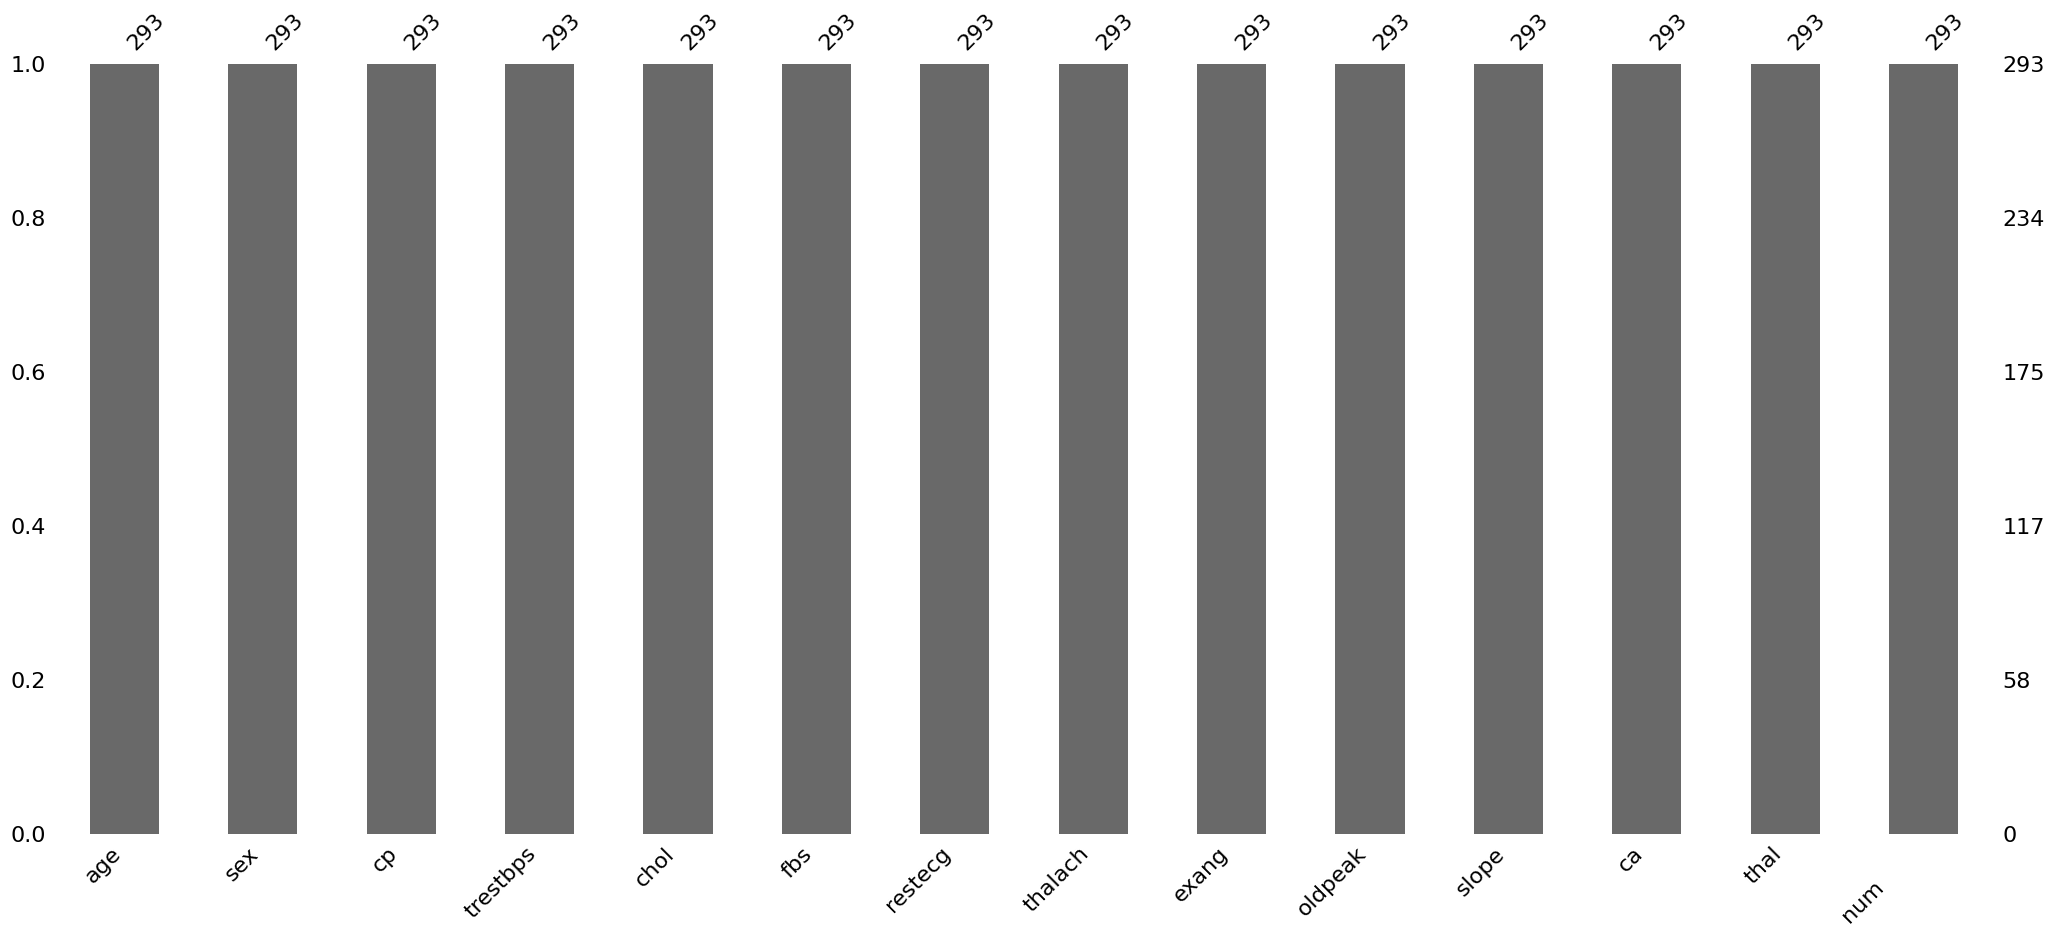

In [8]:
#Member1 #IT24102908 #Data cleaning(Imputation, Removing Duplicates)


f1 = df_base.replace('?', np.nan)

# Visualize missing values
msno.bar(f1)
plt.show()

# Example imputation
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

for col in f1.columns:
    if f1[col].dtype == 'O':  # categorical
        f1[col] = cat_imputer.fit_transform(f1[[col]]).flatten()
    else:  # numerical
        f1[col] = num_imputer.fit_transform(f1[[col]]).flatten()

# Remove duplicates
f1 = f1.drop_duplicates()

# Save cleaned data
f1.to_csv('data.csv', index=False)

In [9]:
print(f1.duplicated().sum())

0


In [10]:
print(f1.isna().sum())

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64
